# `qp` practical example

_Alex Malz, Phil Marshall, Eric Charles_

In this notebook we use the `qp` module to study some photo-Z PDFs.

## Setup, reading ensemble

### Imports

First let's import the packages we will need for this notebook

In [1]:
import numpy as np
import os

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

import qp

### Data files

Now lets download the data files we will need, if we haven't already

In [2]:
# base_url = 'https://slac.stanford.edu/~echarles/qp_example'
# if not os.path.exists('qp_test_ensemble.hf5'):
#     os.system('curl -o %s -OL %s/%s' % ('qp_test_ensemble.hf5', base_url, 'qp_test_ensemble.hf5'))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
curl: (60) SSL certificate problem: unable to get local issuer certificate
More details here: https://curl.se/docs/sslcerts.html

curl failed to verify the legitimacy of the server and therefore could not
establish a secure connection to it. To learn more about this situation and
how to fix it, please visit the web page mentioned above.


### Reading ensemble

Now we read the ensemble, note that we only need the name of the data file, the name of the metadata file is assumed.

In [3]:
#ens = qp.read('qp_test_ensemble.hf5')
QP_DIR = os.path.abspath(os.path.dirname(qp.__file__))
data_file = os.path.join(QP_DIR, 'data', 'test.hdf5')
ens = qp.read(data_file)

### Exploration

This will show use that the 

In [4]:
# Confirm that we have read the ensembles
print("Ensemble = ", ens)
# Print some simple information about the ensemble
print("Rep      = ", ens.gen_class.name)
print("NPDF     = ", ens.npdf)
print("Metadata = ", ens.metadata())

Ensemble =  <qp.ensemble.Ensemble object at 0x7fc2772aa510>
Rep      =  mixmod
NPDF     =  100
Metadata =  {'pdf_name': array([b'mixmod'], dtype='|S6'), 'pdf_version': array([0])}


## Plotting Example

Now we are going to plot some PDFs from the ensemble
Note that the first call to the `plot` specifies the x-axis limits, but does not specify the key (i.e., which PDF in the ensemble), so that defaults to 0 (i.e., the first PDF).

IndexError: index 1300 is out of bounds for axis 0 with size 100

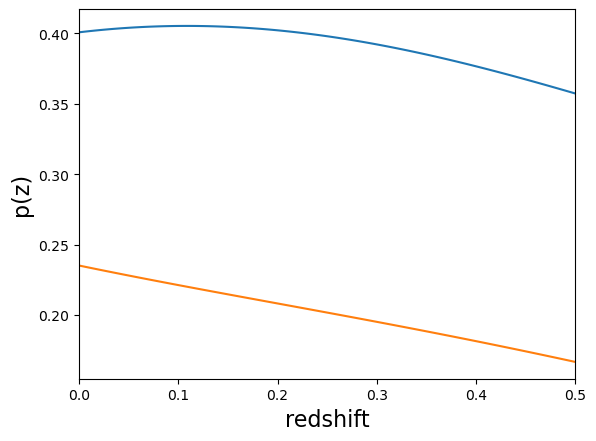

In [5]:
axes = ens.plot(xlim=(0., 0.5), label="PDF 0")
_ = ens.plot(key=1, axes=axes, label="PDF 1")
_ = ens.plot(key=1300, axes=axes, label="PDF 1300")
legend = axes.figure.legend()

## Timing benchmarks

Now we are going to extract some information from the ensemble and time how long it takes to do so

In [ ]:
# These are the grid points and quantiles at which we will extract values
test_xvals = ens.gen_obj.xvals
test_quantiles = np.linspace(0, 1, 51)

In [ ]:
%%time
# Time the pdf evaluation for 20000 PDFs
pdfs = ens.pdf(test_xvals)

In [ ]:
%%time
# Time the cdf (Cumulative distribution function) evaluation for 20000 PDFs
cdfs = ens.cdf(test_xvals)

In [ ]:
%%time
ppfs = ens.ppf(test_quantiles)

In [ ]:
%%time
# Time the sf (survival fraction, 1-cdf) evaluation for 20000 PDFs
sfs = ens.sf(test_xvals)

In [ ]:
%%time
# Time the isf (inverse survival fraction) evaluation for 20000 PDFs
isfs = ens.isf(test_quantiles)

In [ ]:
%%time
# Time the generation of 100 samples for each of the 20000 PDFs
samples = ens.rvs(size=100)

### Changing the grid for the representation

In [ ]:
%%time
# Convert to a grid using 51 grid points
ens_g51 = qp.convert(ens, 'interp', xvals=np.linspace(0, 3, 51))

In [ ]:
%%time
# Convert to a grid using 21 grid points
ens_g21 = qp.convert(ens, 'interp', xvals=np.linspace(0, 1, 21))

In [ ]:
key = 0
axes_g = ens.plot(key, xlim=(0, 0.5), label="orig")
_ = ens_g51.plot(key, axes=axes_g, label="g51")
_ = ens_g21.plot(key, axes=axes_g, label="g21")
leg_g = axes_g.figure.legend()

### Conversion to other represenations

####  quantile representaion

In [ ]:
%%time
# Convert using 51 quantiles
ens_q51 = qp.convert(ens, 'quant', quants=np.linspace(0.01, 0.99, 51))

In [ ]:
%%time
# Convert using 21 quantiles
ens_q21 = qp.convert(ens, 'quant', quants=np.linspace(0.01, 0.99, 21))

In [ ]:
key = 0
axes_q = ens.plot(key, xlim=(0, 0.5), label="orig")
_ = ens_q51.plot(key, axes=axes_q, label="q51")
_ = ens_q21.plot(key, axes=axes_q, label="q21")
leg_q = axes_q.figure.legend()

#### Histogram representation

In [ ]:
%%time
# Convert to a histogram using 51 bins
ens_h51 = qp.convert(ens, 'hist', bins=np.linspace(0, 3.0, 51))

In [ ]:
%%time
# Convert to a histogram using 21 bins
ens_h21 = qp.convert(ens, 'hist', bins=np.linspace(0, 3.0, 21))

In [ ]:
key = 0
axes_h = ens.plot(key, xlim=(0, 0.5), label="orig")
_ = ens_h51.plot(key, axes=axes_h, label="h51")
_ = ens_h21.plot(key, axes=axes_h, label="h21")
leg_h = axes_h.figure.legend()

### Other representations

`qp` also includes spline-based and Gaussian mixture represenations.   The conversion to these forms much slower, so we will first reduce the base ensemble from 20000 PDFs to 100 PDFs

In [ ]:
ens_red = ens[np.arange(100)]
print("Reduced ensemble has %i PDFs" % (ens_red.npdf))

#### Spline representation

We can convert to the spline representation a few different ways.  This particular method specifies that we should evaluate each PDF at a grid of points and then use those to construct the spline represenation.  We do this for 2 different grids.  Note how much slower this conversion function is that the ones above.

In [ ]:
%%time
# Convert to a histogram using 51 grid points
ens_s51 = qp.convert(ens_red, 'spline', xvals=np.linspace(0, 3.0, 51), method="xy")

In [ ]:
ens_s21 = qp.convert(ens_red, 'spline', xvals=np.linspace(0, 3.0, 21), method="xy")

In [ ]:
key = 0
axes_s = ens_red.plot(key, xlim=(0, 0.5), label="orig")
_ = ens_s51.plot(key, axes=axes_s, label="s51")
_ = ens_s21.plot(key, axes=axes_s, label="s21")
leg_s = axes_s.figure.legend()

#### Gaussian mixture model

In [ ]:
%%time
# Convert to a gaussian mixture using 301 sample points and 3 components
ens_m3 = qp.convert(ens_red, 'mixmod', xvals=np.linspace(0, 3.0, 301), ncomps=3)

In [ ]:
%%time
# Convert to a gaussian mixture using 301 sample points and 3 components
ens_m5 = qp.convert(ens_red, 'mixmod', xvals=np.linspace(0, 3.0, 301), ncomps=5)

In [ ]:
key = 0
axes_m = ens_red.plot(key, xlim=(0, 0.5), label="orig")
_ = ens_m3.plot(key, axes=axes_m, label="m3")
_ = ens_m5.plot(key, axes=axes_m, label="m5")
leg_m = axes_m.figure.legend()

In [ ]:
key = 1
axes_m1 = ens_red.plot(key, xlim=(0, 0.5), label="orig")
_ = ens_m3.plot(key, axes=axes_m1, label="m3")
_ = ens_m5.plot(key, axes=axes_m1, label="m5")
leg_m1 = axes_m1.figure.legend()